In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('C:\\Users\\Abhishek\\Downloads\\database_IND.csv')

In [6]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
df.isin([' ','NA','-','?']).sum().any()

False

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


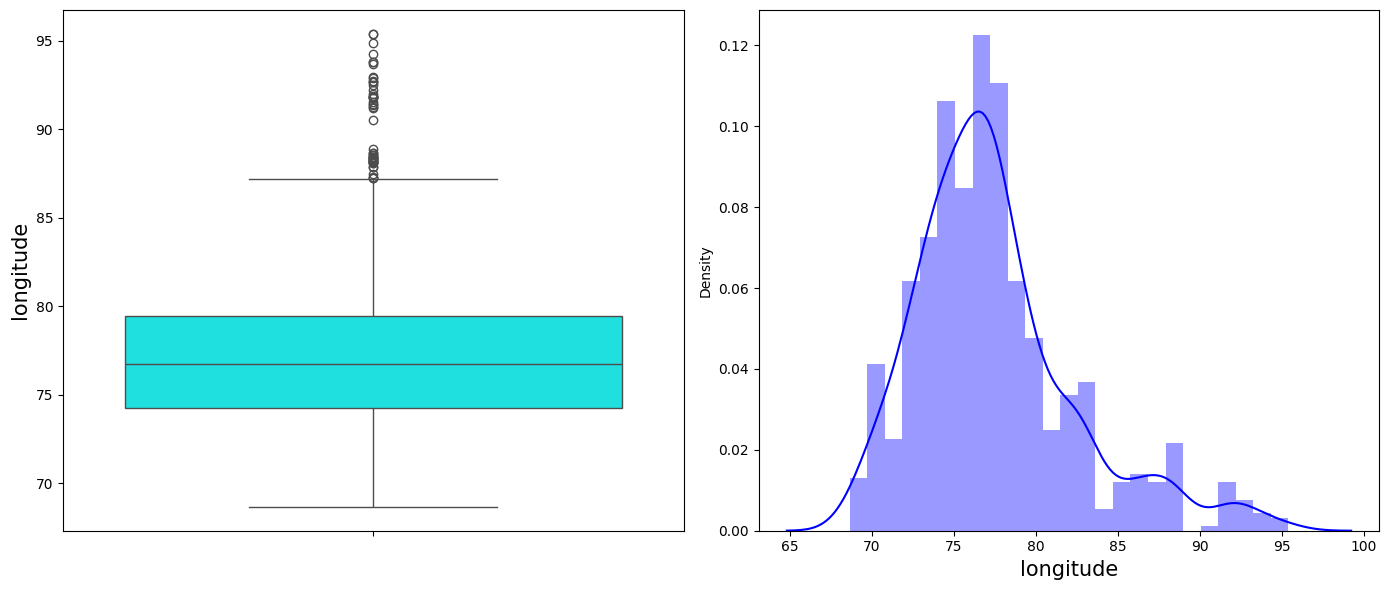

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

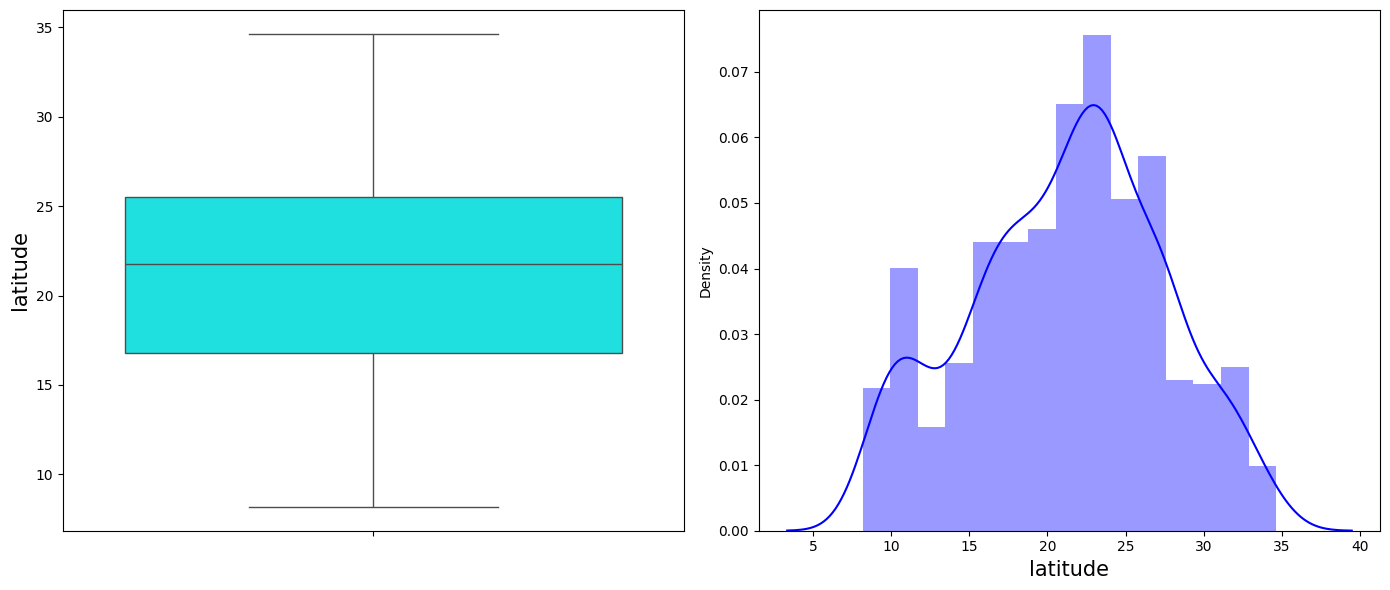

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [15]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

df['longitude'] = df['longitude'].fillna(df['longitude'].median())

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [16]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


In [17]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.427103,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.079148,4.815073,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.281800,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [18]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [19]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [20]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


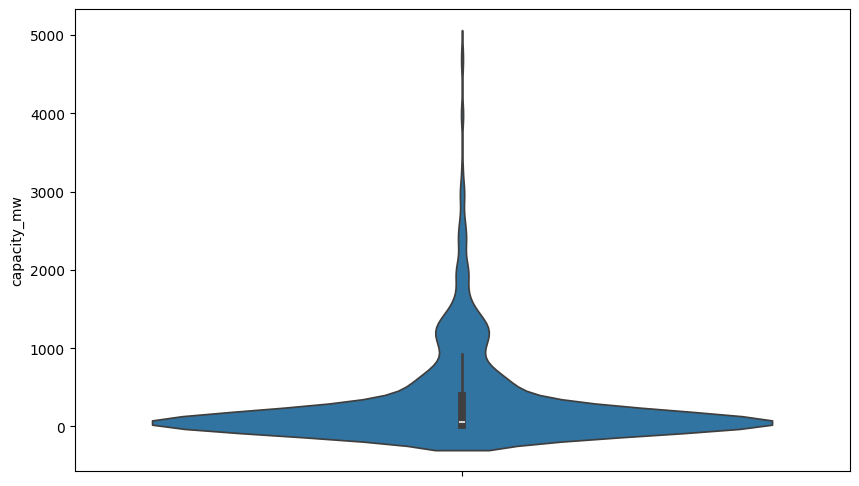

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [22]:
df.loc[df.capacity_mw >1500].shape

(39, 17)

In [23]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

TypeError: countplot() got multiple values for argument 'data'

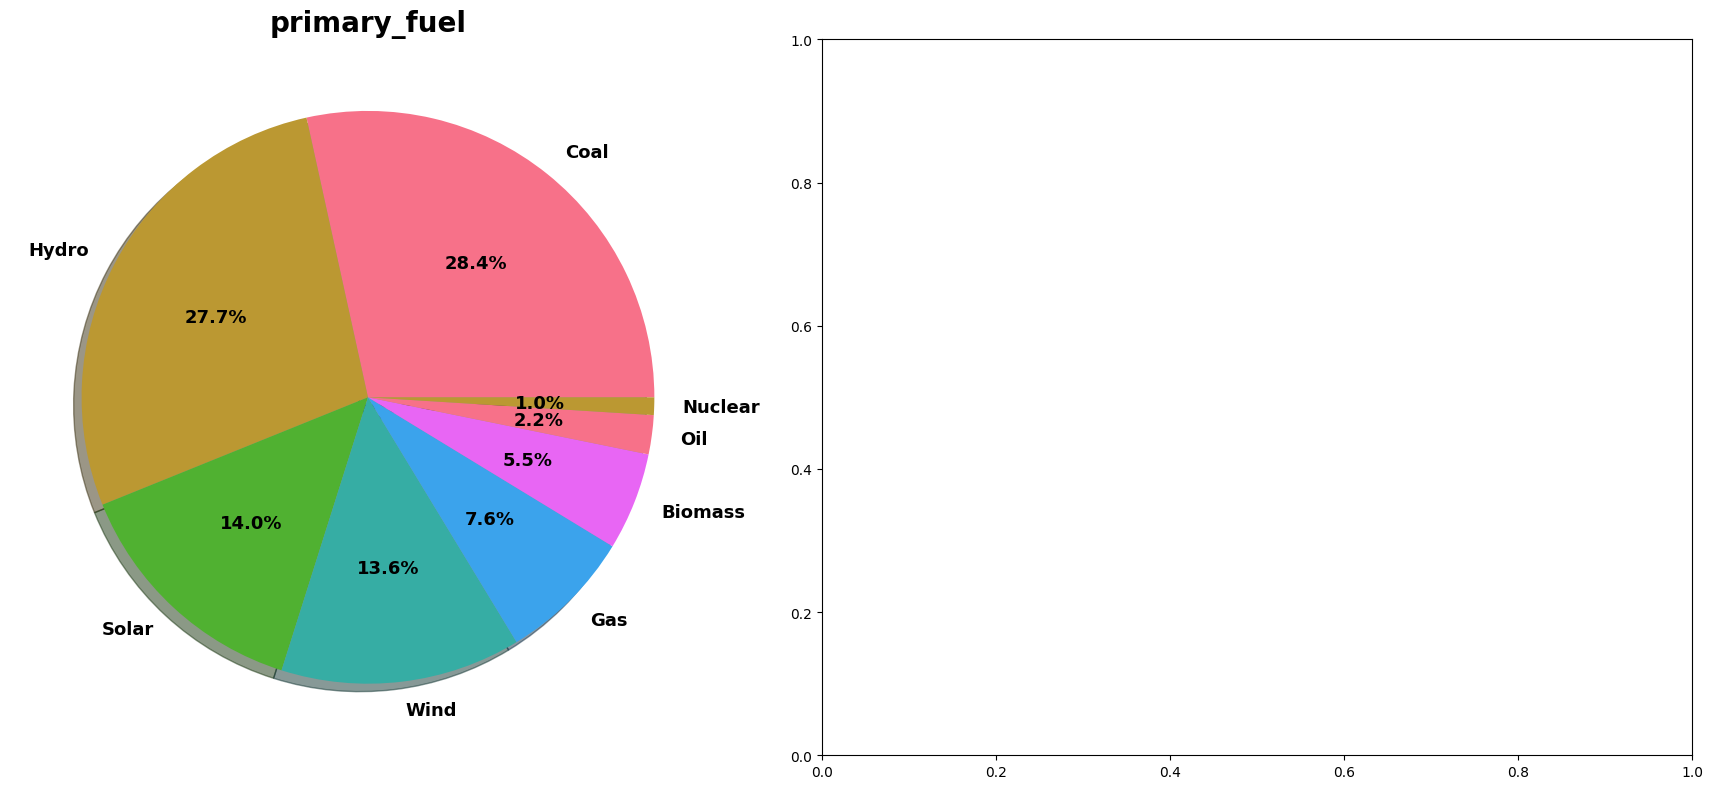

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [25]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

In [26]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [27]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


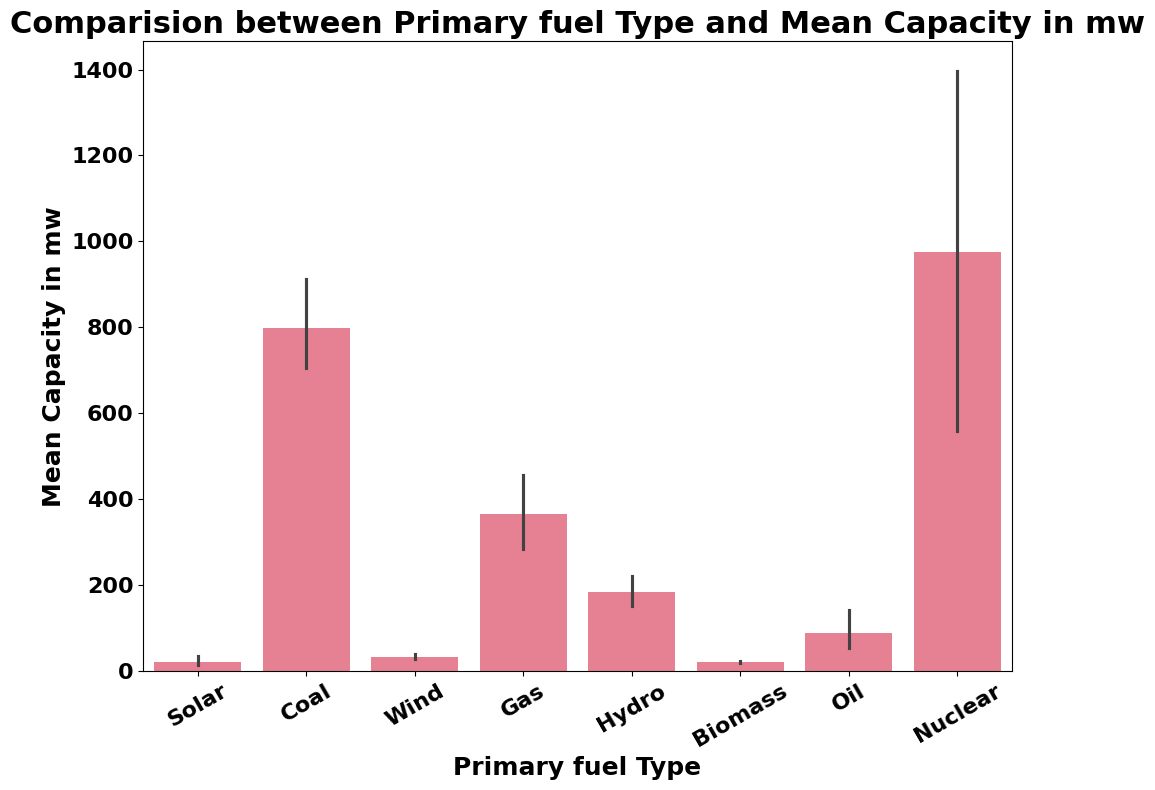

In [28]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

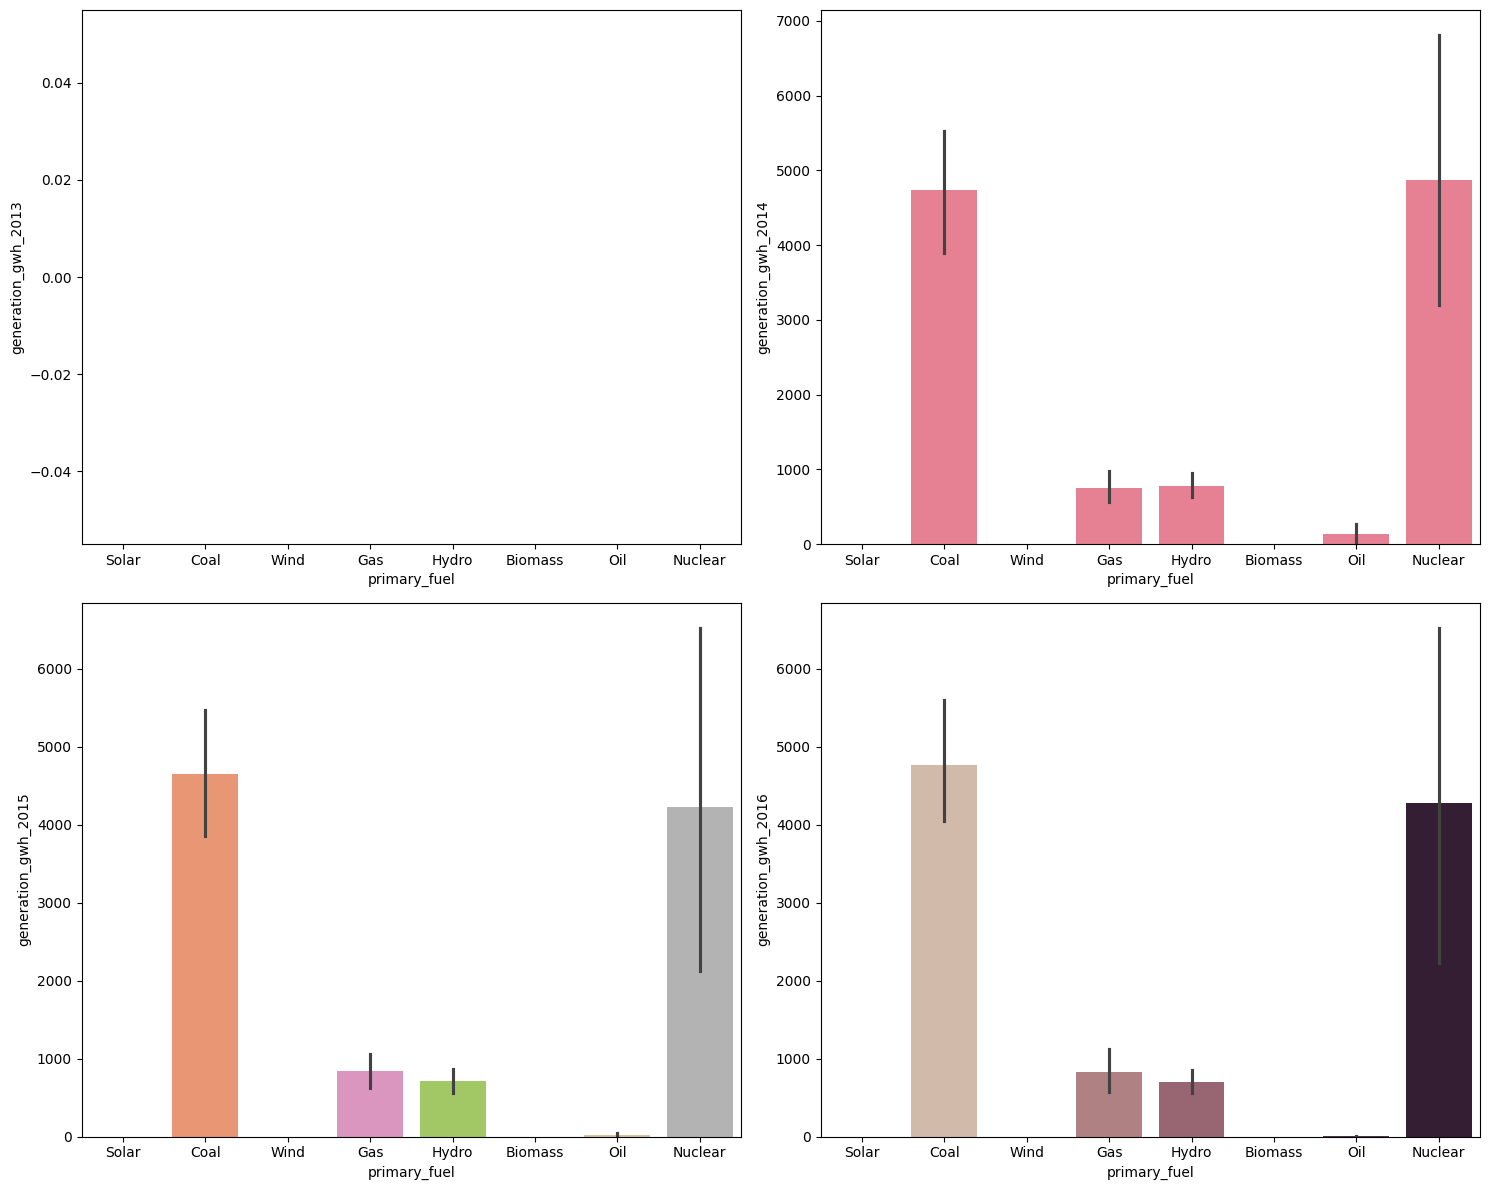

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)


sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)


sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")


sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

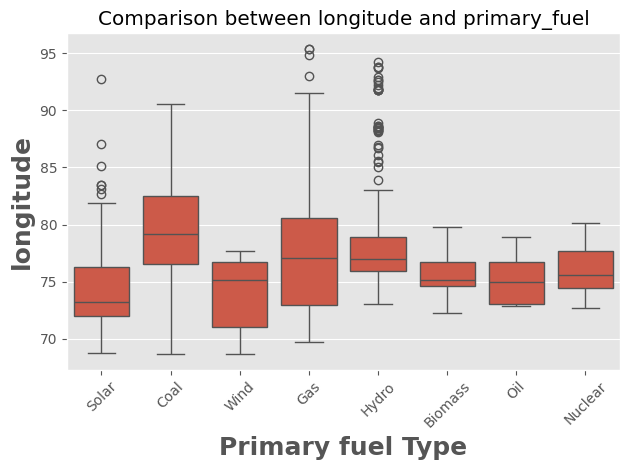

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.title('Comparison between longitude and primary_fuel')

a = sns.boxplot(x=df['primary_fuel'], y=df["longitude"])


a.set_xlabel('Primary fuel Type', fontsize=18, fontweight='bold')
a.set_ylabel('longitude', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)  
plt.show()


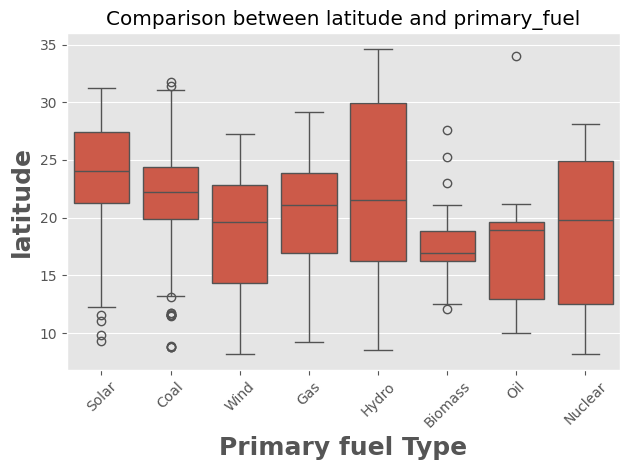

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.title('Comparison between latitude and primary_fuel')

a = sns.boxplot(x=df['primary_fuel'], y=df["latitude"])

a.set_xlabel('Primary fuel Type', fontsize=18, fontweight='bold')
a.set_ylabel('latitude', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


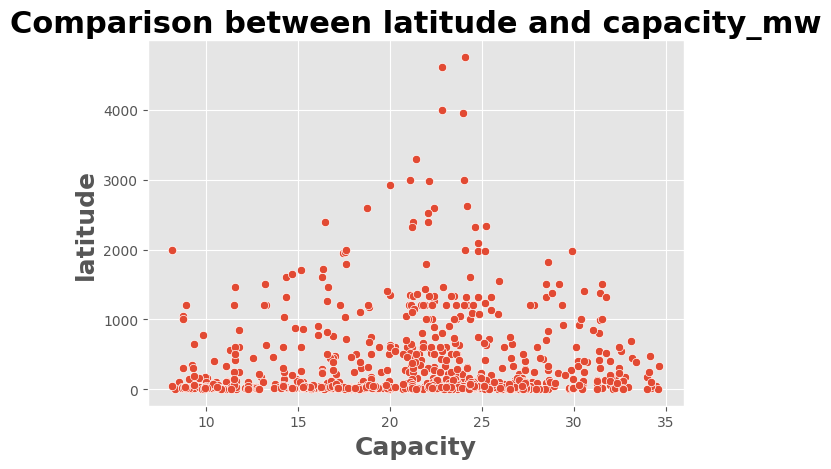

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.title('Comparison between latitude and capacity_mw', fontsize=22, fontweight='bold')


a = sns.scatterplot(x=df['latitude'], y=df["capacity_mw"])


a.set_xlabel('Capacity', fontsize=18, fontweight='bold')
a.set_ylabel('latitude', fontsize=18, fontweight='bold')
plt.show()


In [40]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [41]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [42]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,NaN,220.82035,215.3777,144.4143,175.92595,282.76905,NaN,Central Electricity Authority,91.0


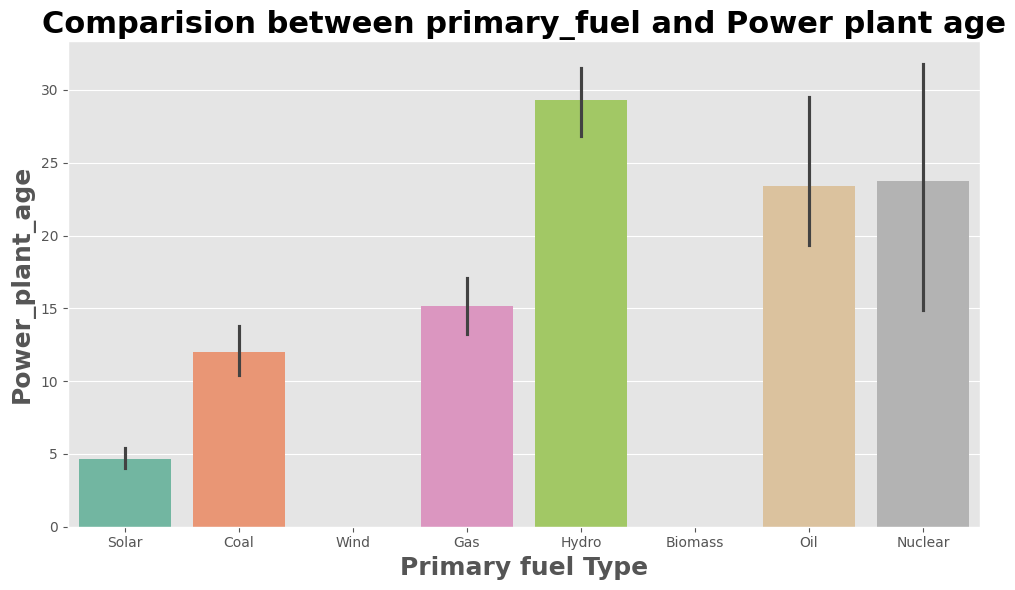

In [43]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

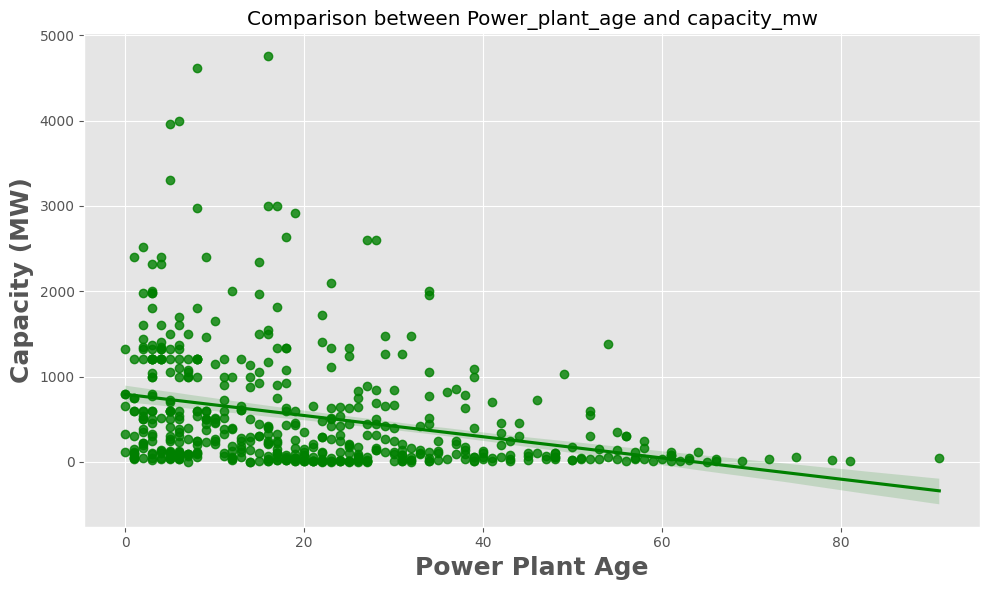

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10, 6])
plt.title('Comparison between Power_plant_age and capacity_mw')


sns.regplot(x=df['Power_plant_age'], y=df['capacity_mw'], color="g")

plt.xlabel('Power Plant Age', fontsize=18, fontweight='bold')
plt.ylabel('Capacity (MW)', fontsize=18, fontweight='bold')
plt.show()


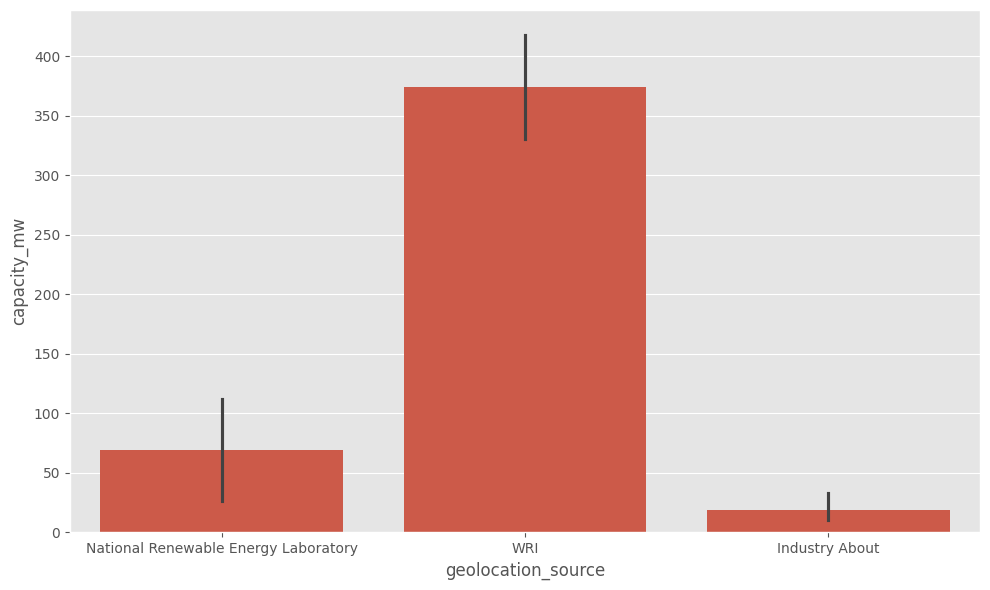

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

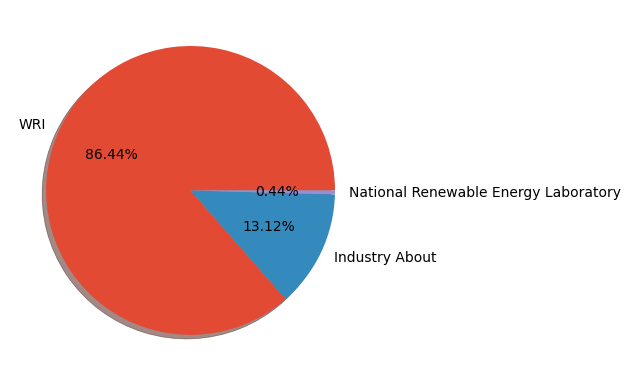

In [48]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [49]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

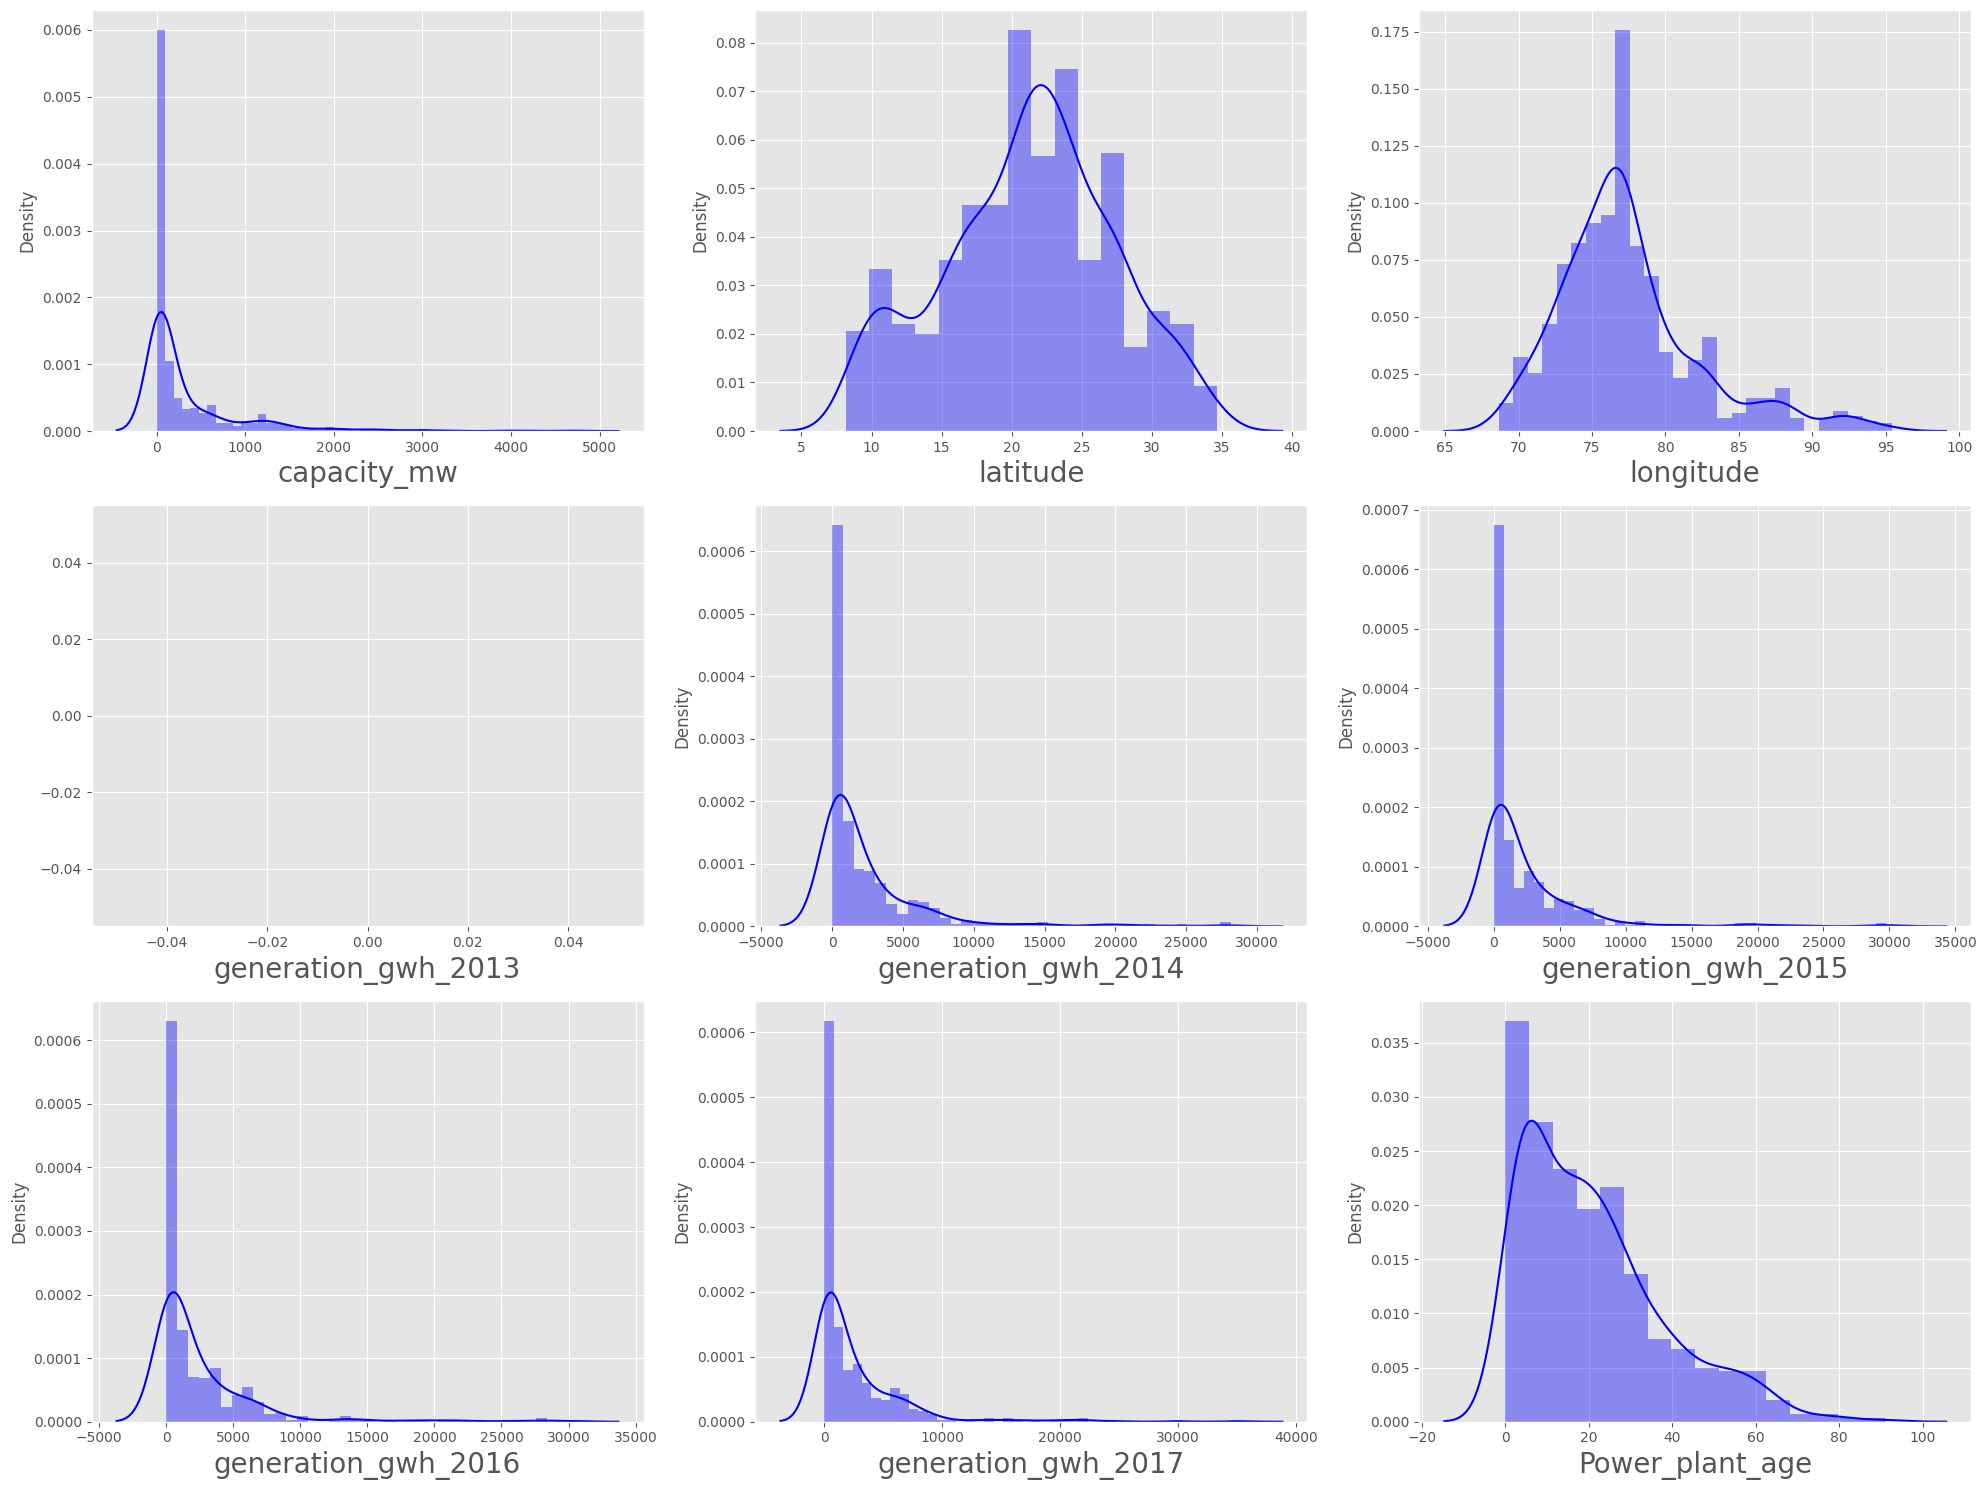

In [50]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

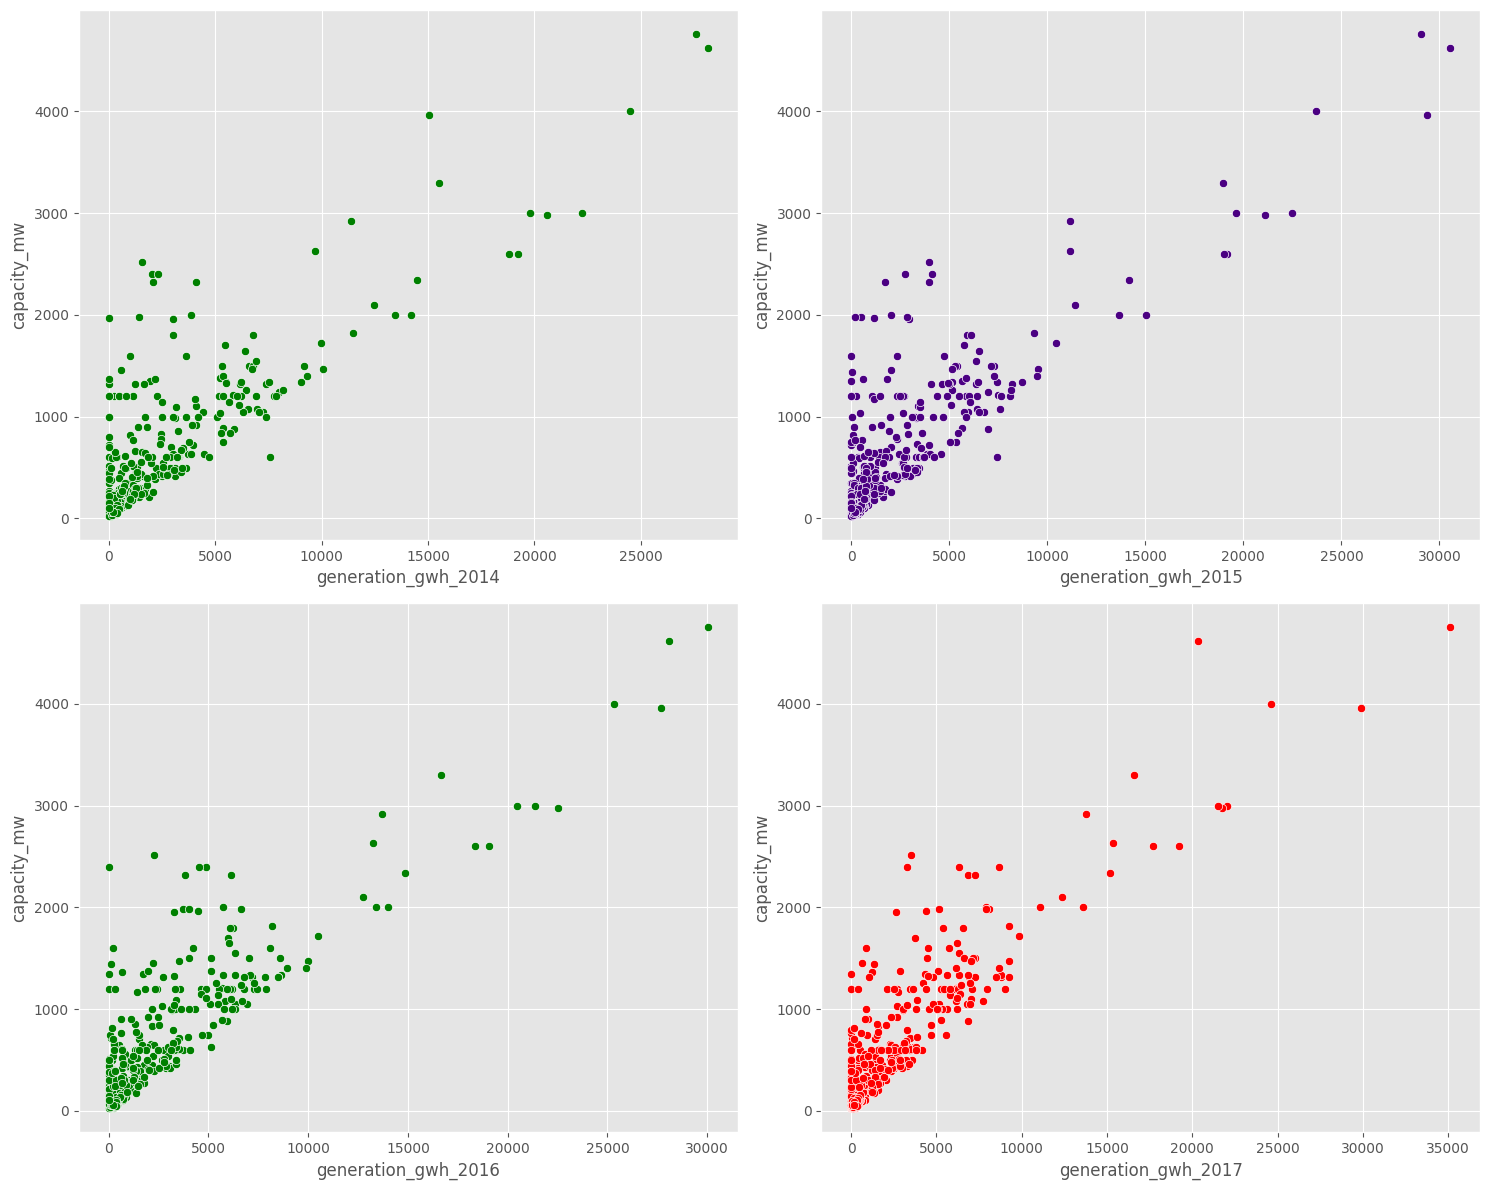

In [51]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

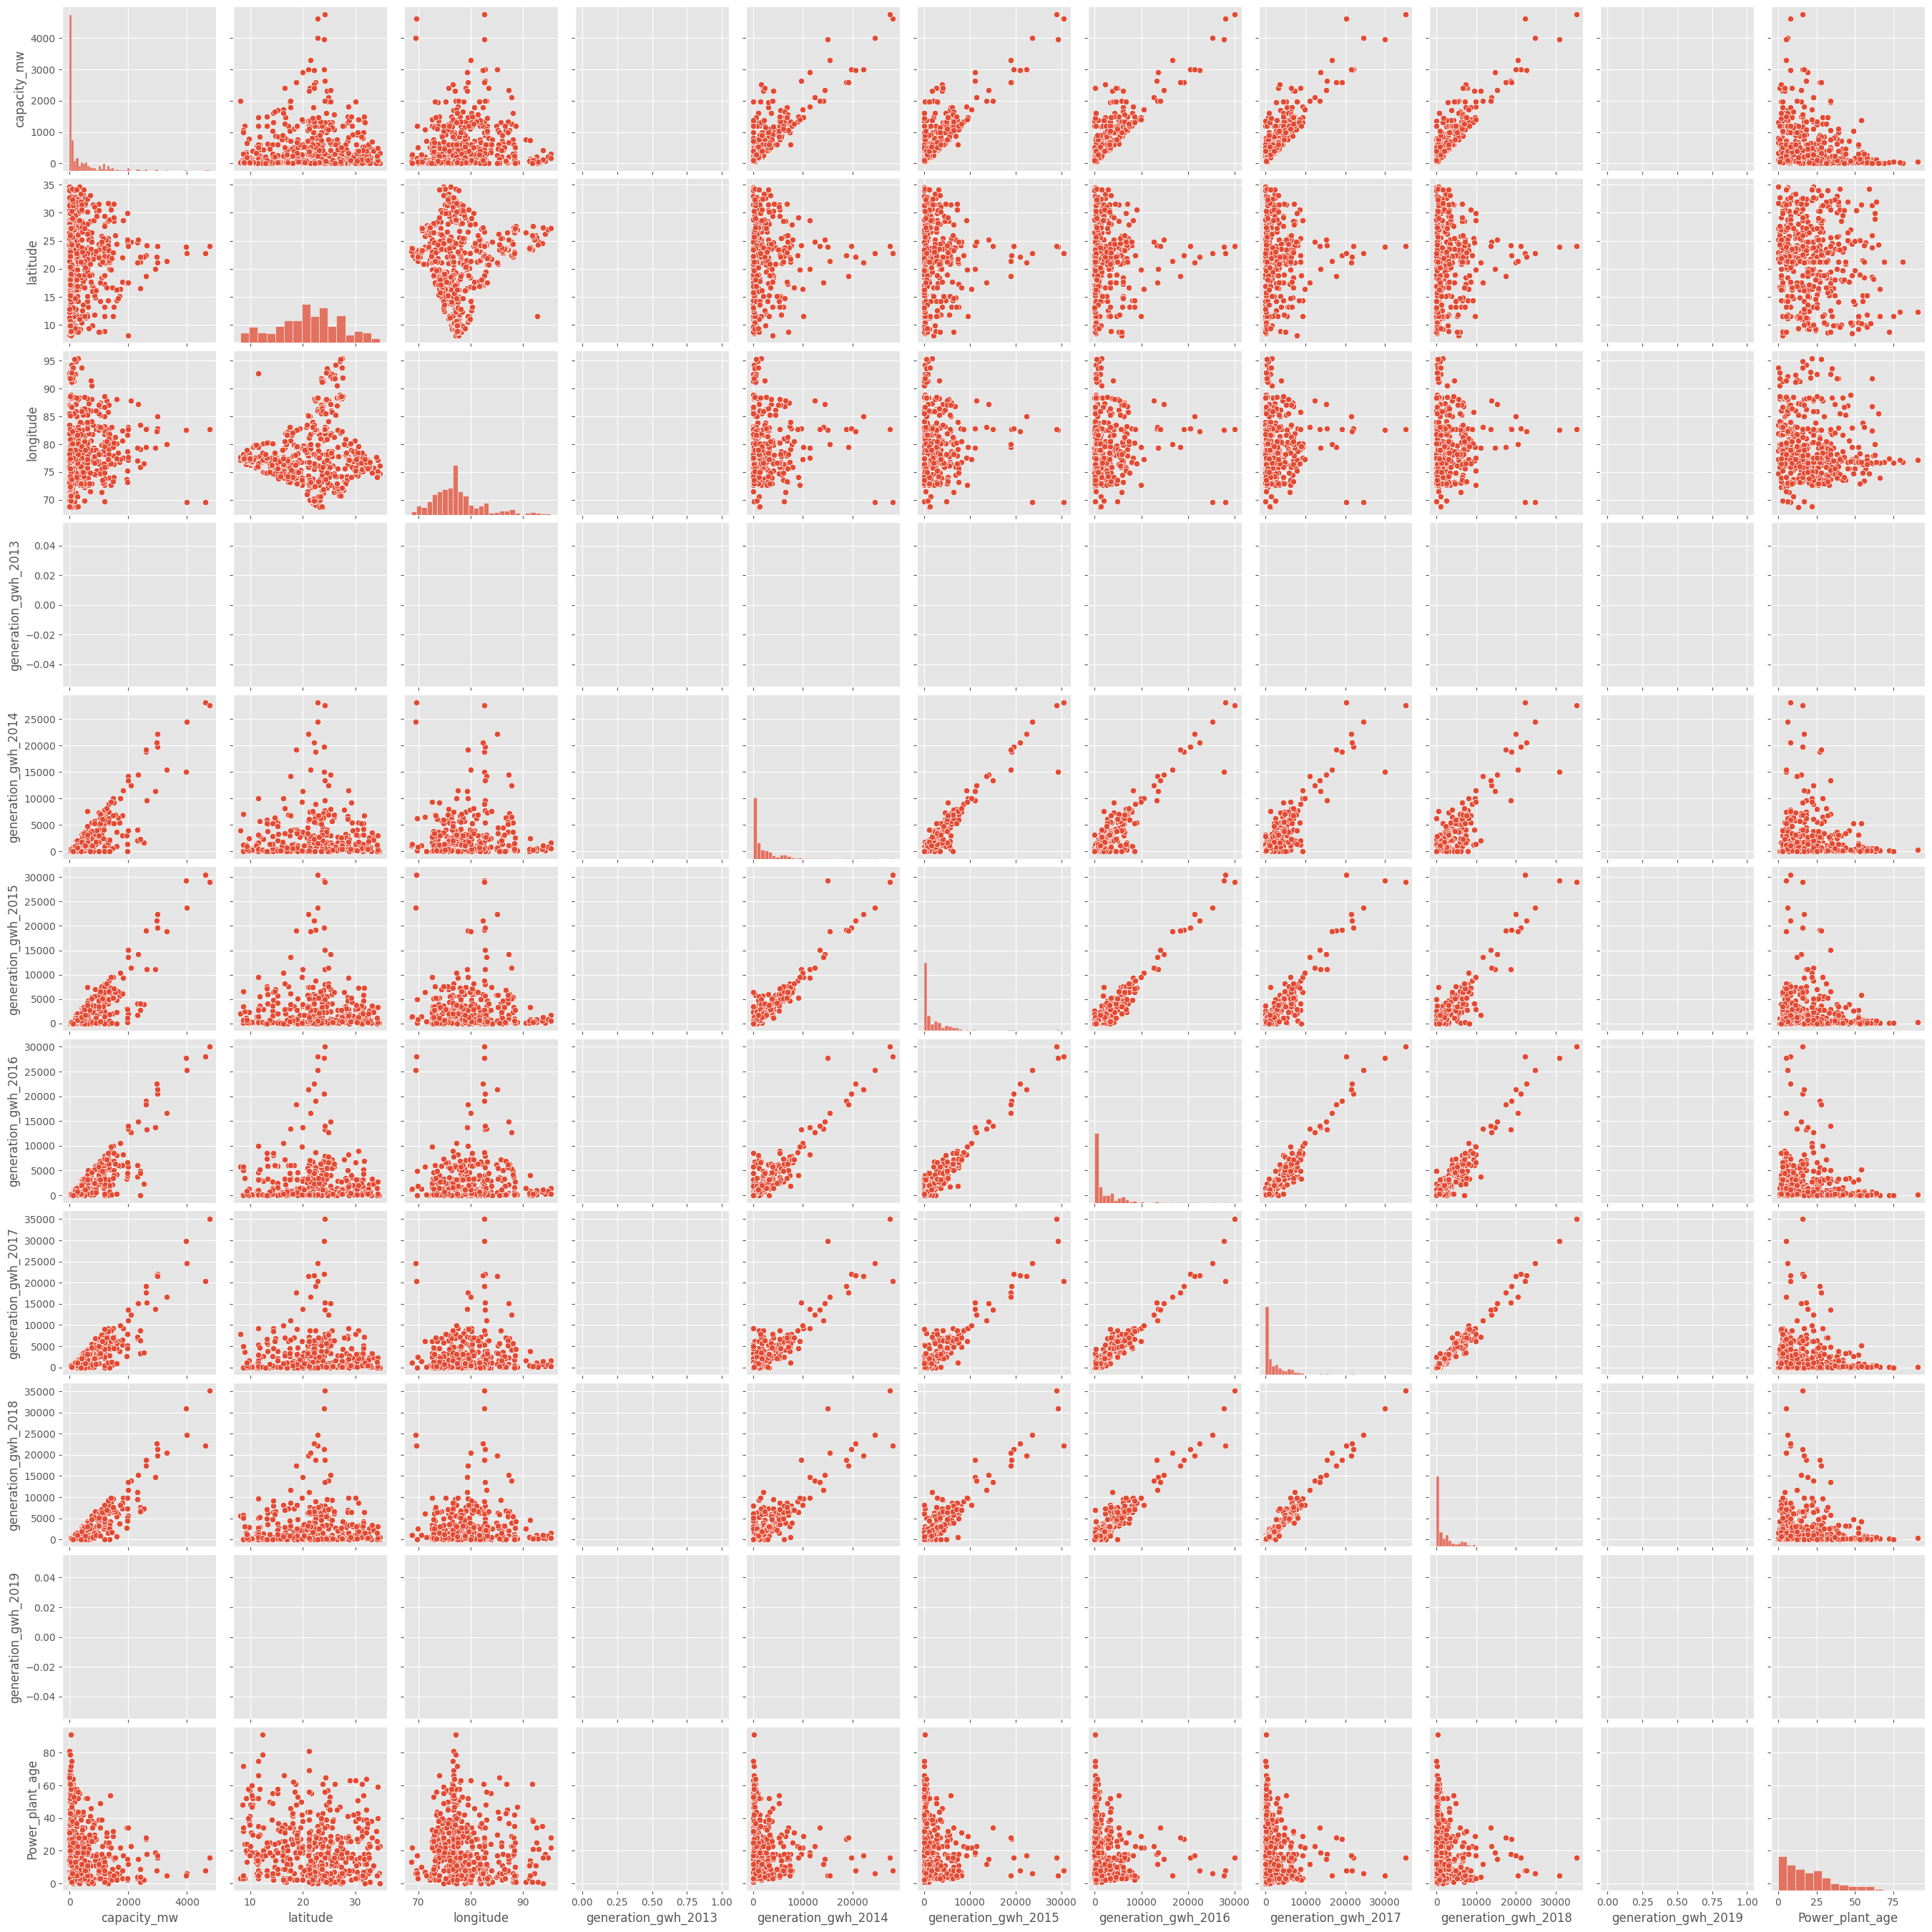

In [52]:
sns.pairplot(df)

In [53]:
df.drop(columns=['name'],axis=1,inplace=True)

In [54]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [55]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,3.0


ValueError: List of boxplot statistics and `positions` values must have same the length

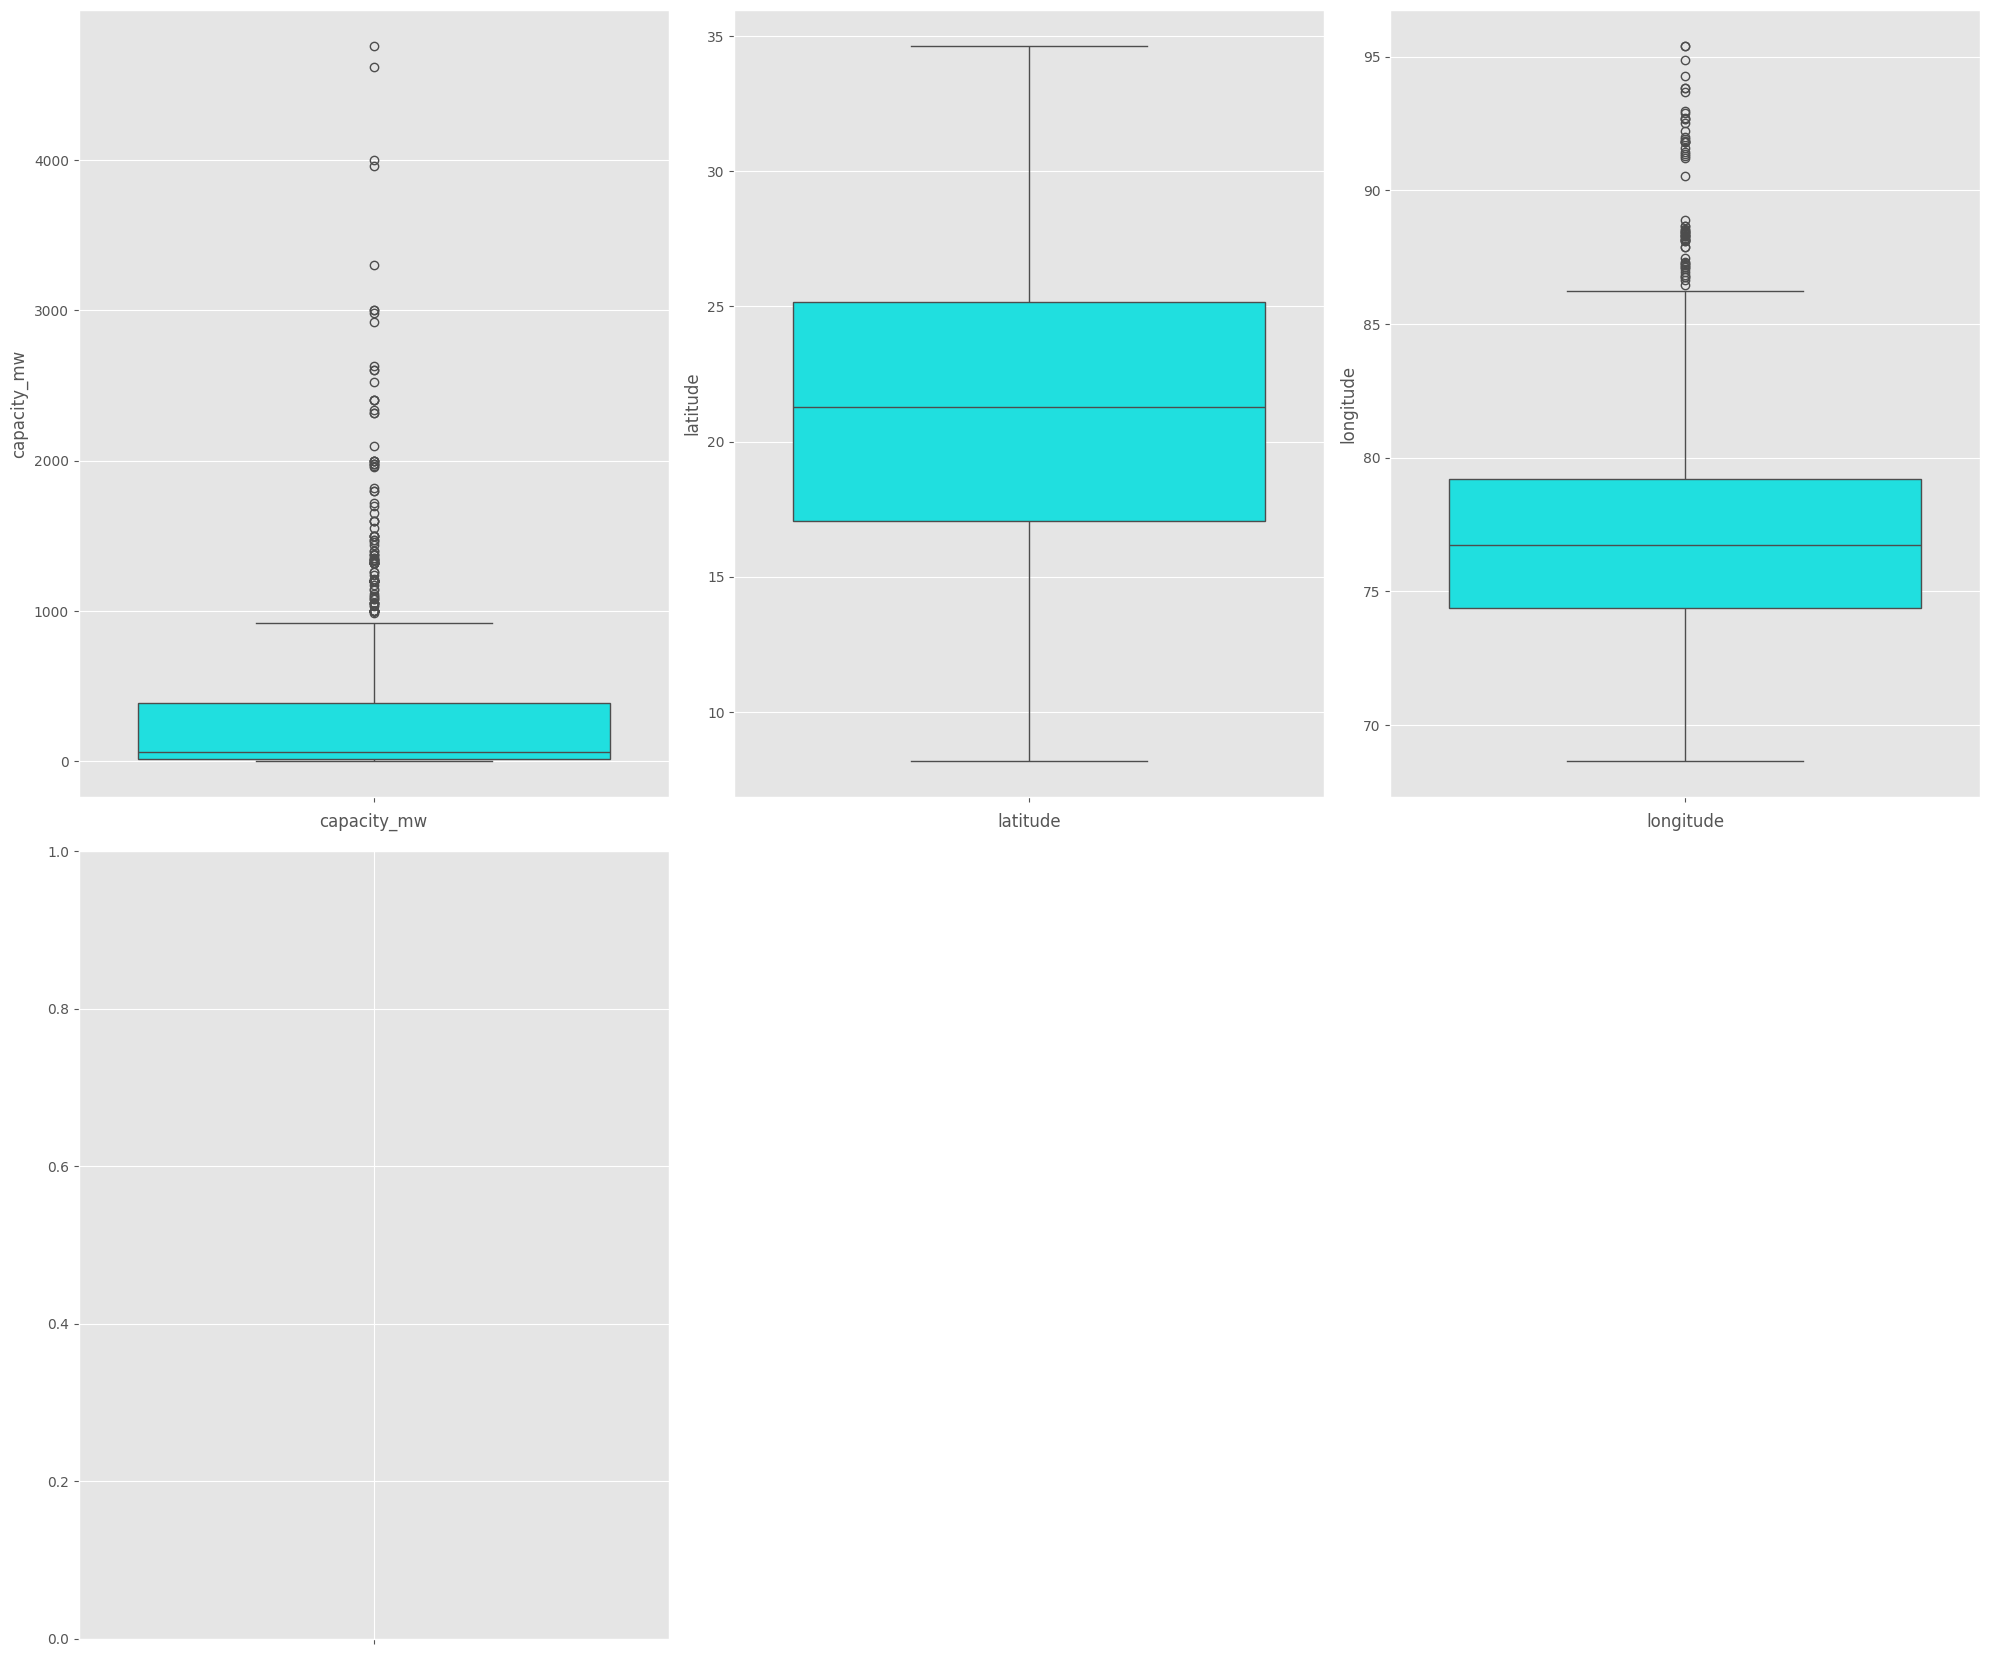

In [57]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [58]:
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [59]:
df2=df.copy

In [60]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2013           NaN
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
generation_gwh_2019           NaN
Power_plant_age          39.00000
dtype: float64


In [61]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 13)


In [62]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


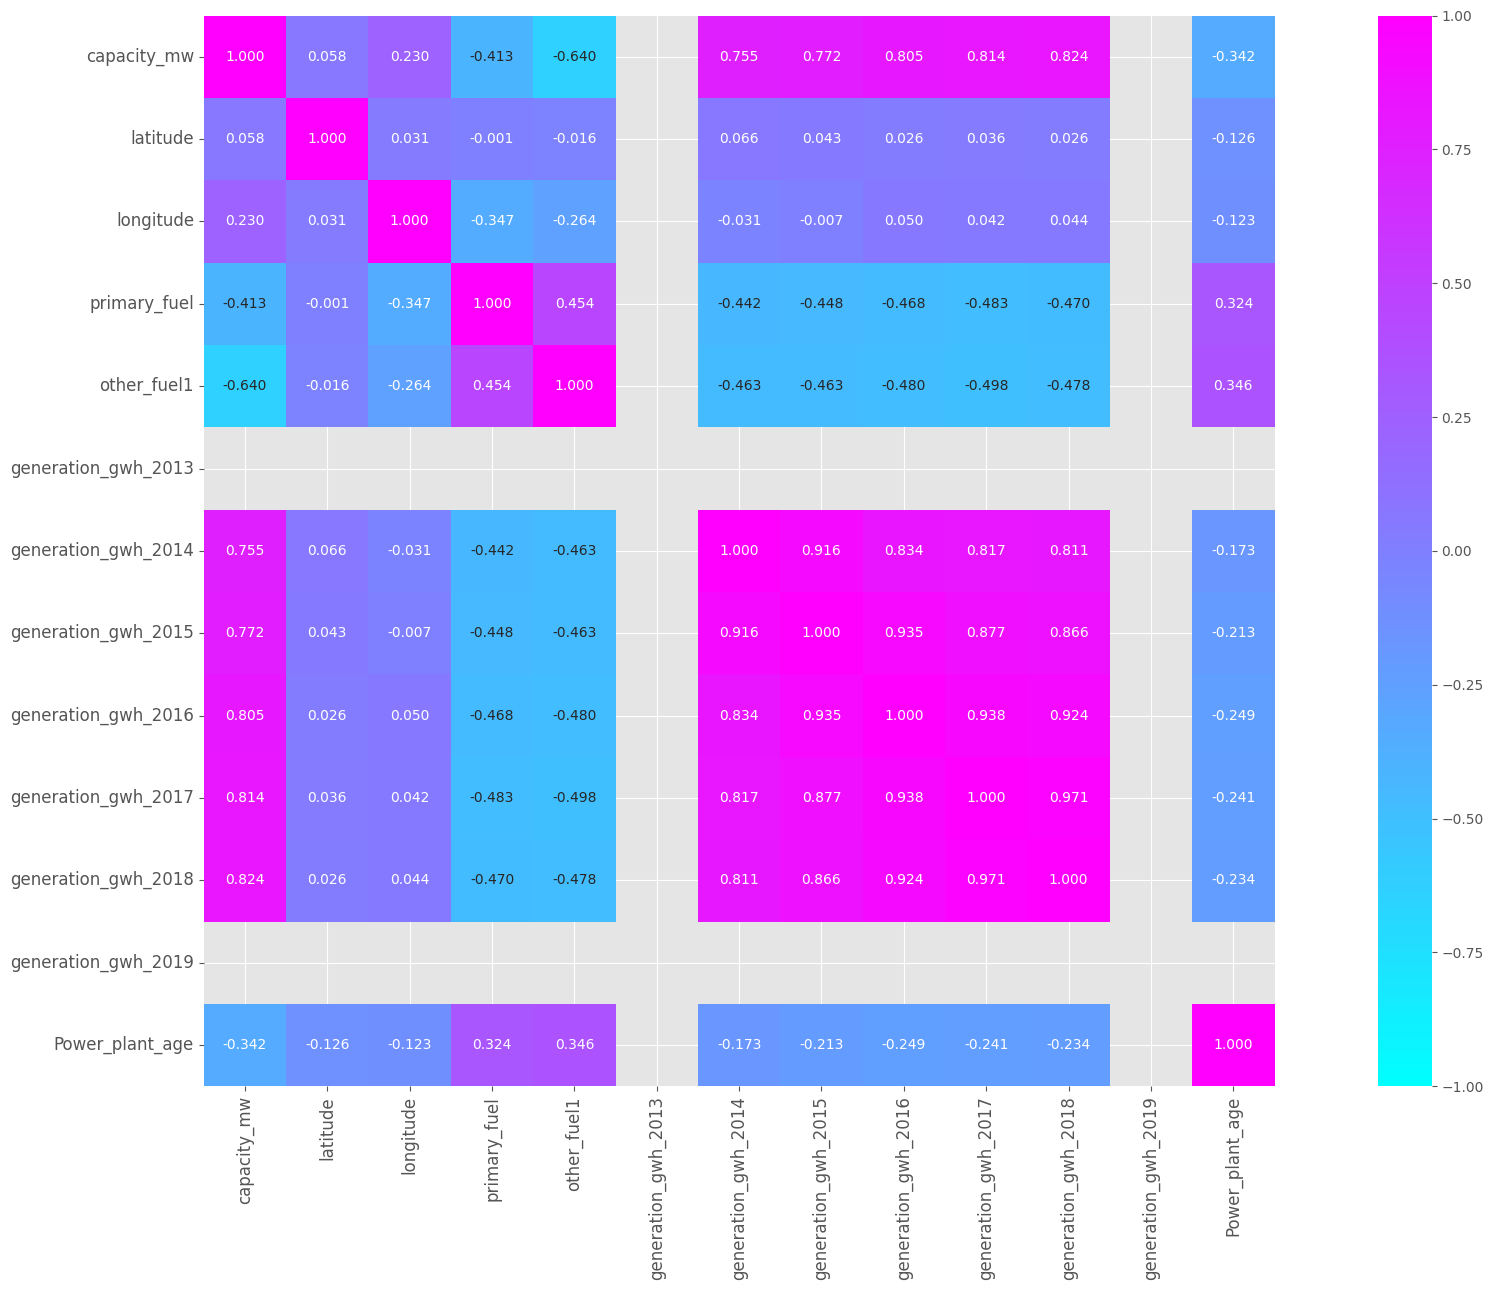

In [63]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

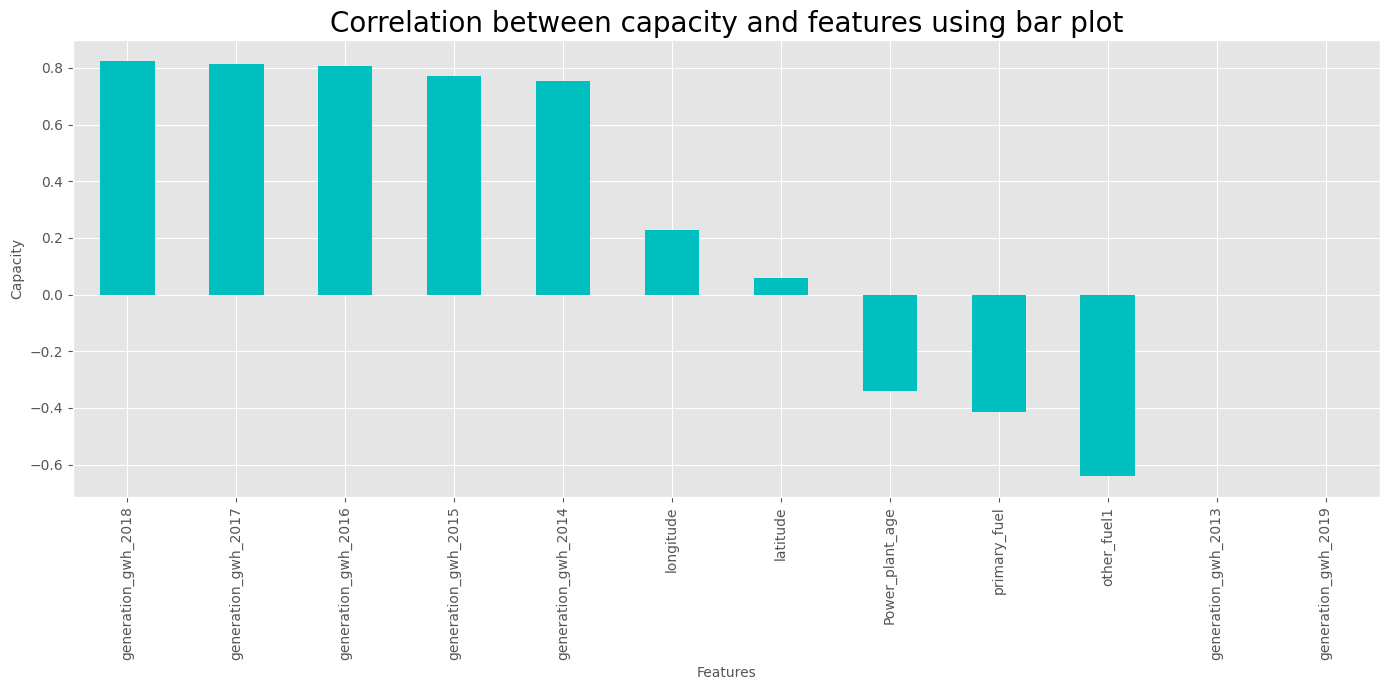

In [64]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

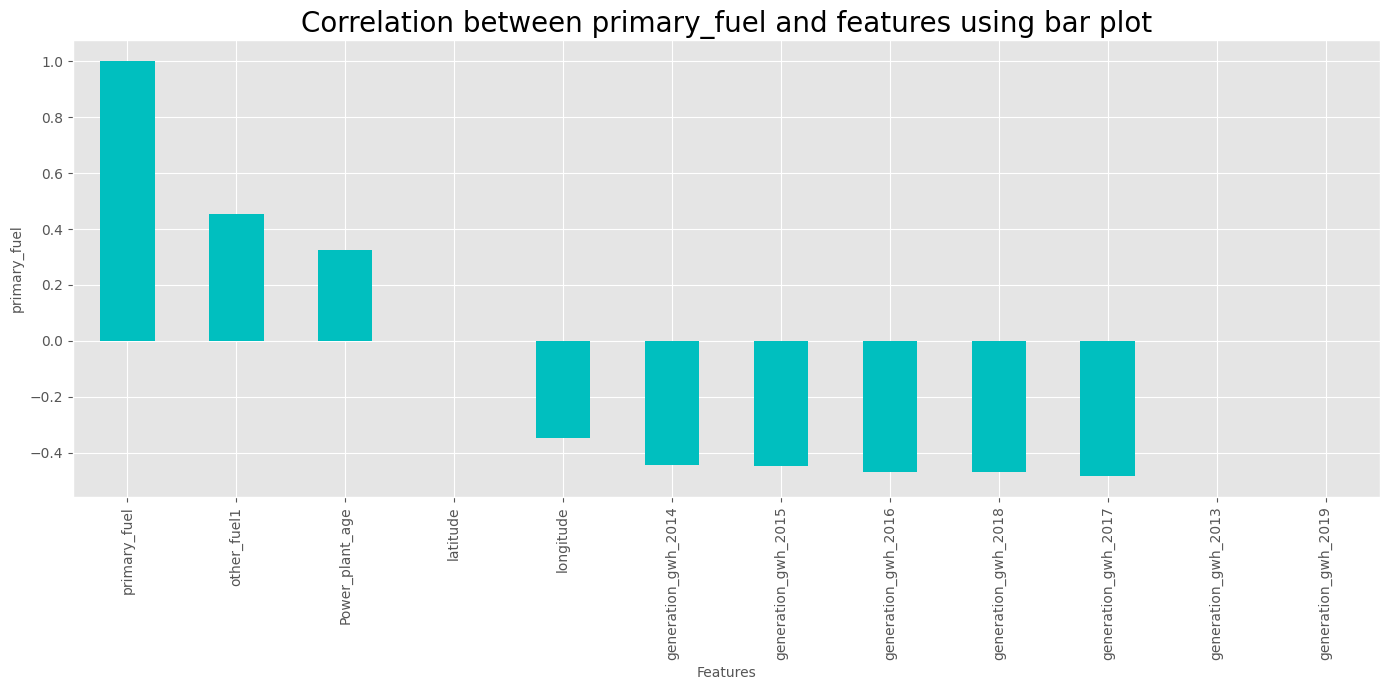

In [65]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [66]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2013         NaN
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
generation_gwh_2019         NaN
Power_plant_age        1.030123
dtype: float64

In [67]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [70]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

In [72]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2013         NaN
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
generation_gwh_2019         NaN
Power_plant_age        1.030123
dtype: float64

In [73]:
data.drop("other_fuel1",axis=1,inplace=True)

In [74]:
data.drop("other_fuel1",axis=1,inplace=True)

data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

KeyError: "['other_fuel1'] not found in axis"

In [75]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [77]:
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [78]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 6)
Training target vector size: (613,)
Test feature matrix size: (264, 6)
Test target vector size: (264,)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values